In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing, tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import kagglehub
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# **Load data**

In [ ]:
downlod_data = kagglehub.dataset_download('sameepvani/nasa-nearest-earth-objects')
read_data = pd.read_csv("/root/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo.csv")
data = pd.DataFrame(read_data)
display(data)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
data.drop(['id' , 'name'], axis= 1, inplace=True)

# **Encoder**

In [ ]:
for column in ['orbiting_body', 'sentry_object', 'hazardous']:
    data[column] = pd.Categorical(data[column]).codes

# **Balance target**

In [ ]:
data_analyses , test_data = train_test_split(data , test_size = 0.2, random_state= 42)

In [ ]:
print(test_data.hazardous.value_counts())
print(data_analyses.hazardous.value_counts())

hazardous
0    16439
1     1729
Name: count, dtype: int64
hazardous
0    65557
1     7111
Name: count, dtype: int64


In [ ]:
# 1 --> 0
# smote = SMOTE()
# data_balance, target_balance = smote.fit_resample(data_analyses,data_analyses['hazardous'])
# data_balance['hazardous'] = target_balance
# data_analyses = data_balance

In [ ]:
# print(data_analyses.hazardous.value_counts())

In [ ]:
# # 1 --> 0
df_minority_upsampled = resample(data_analyses[data_analyses.hazardous== 1], replace= True, n_samples= len(data_analyses[data_analyses.hazardous== 0]), random_state= 42)
data_analyses = pd.concat([data_analyses[data_analyses.hazardous== 0], df_minority_upsampled])

In [ ]:
print(data_analyses.hazardous.value_counts())

hazardous
0    65557
1    65557
Name: count, dtype: int64


In [ ]:
# 0 --> 1
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= len(data_analyses[data_analyses.hazardous== 1]), random_state= 42)
# data_analyses = pd.concat([df_majority_upsampled, data_analyses[data_analyses.hazardous== 1]], axis=0)

In [ ]:
# 0 --> 1
# 1 --> 0
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= int(len(data_analyses[data_analyses.hazardous== 1])* 0.5), random_state= 42)

# df_minority_upsampled = resample(data_analyses[data_analyses.hazardous== 1], replace= True, n_samples= int(len(df_majority_upsampled)), random_state= 42)

# data_analyses = pd.concat([df_majority_upsampled, df_minority_upsampled], axis=0)

# data_analyses = data_analyses.sample(frac= 1, random_state= 42).reset_index(drop= True)

# print(data_analyses.hazardous.value_counts())
# print(df_majority_upsampled.hazardous.value_counts())

# **Check data**

In [ ]:
data_analyses.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,131114.000000,131114.000000,131114.000000,1.311140e+05,131114.0,131114.0,131114.000000,131114.000000
mean,0.201755,0.451137,54503.748157,3.833331e+07,0.0,0.0,22.092651,0.500000
std,0.305424,0.682949,26953.894211,2.185005e+07,0.0,0.0,2.831474,0.500002
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.040230,0.089958,33949.657821,1.931617e+07,0.0,0.0,20.200000,0.000000
50%,0.135692,0.303417,50775.400231,3.936275e+07,0.0,0.0,21.460000,0.500000
75%,0.242412,0.542051,70220.638757,5.741287e+07,0.0,0.0,24.100000,1.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


In [ ]:
data_analyses.drop(['sentry_object', 'orbiting_body'] , axis = 1 , inplace = True)

# **Copy data to remove noise**::

In [ ]:
data_noise = data_analyses

In [ ]:
lowoutliers  = data_analyses.absolute_magnitude.quantile(0.75) + (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
highoutliers = data_analyses.absolute_magnitude.quantile(0.25) - (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5

<ipython-input-66-d039f7caf461>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.absolute_magnitude, palette=['#c150e5'], ax = ax2)


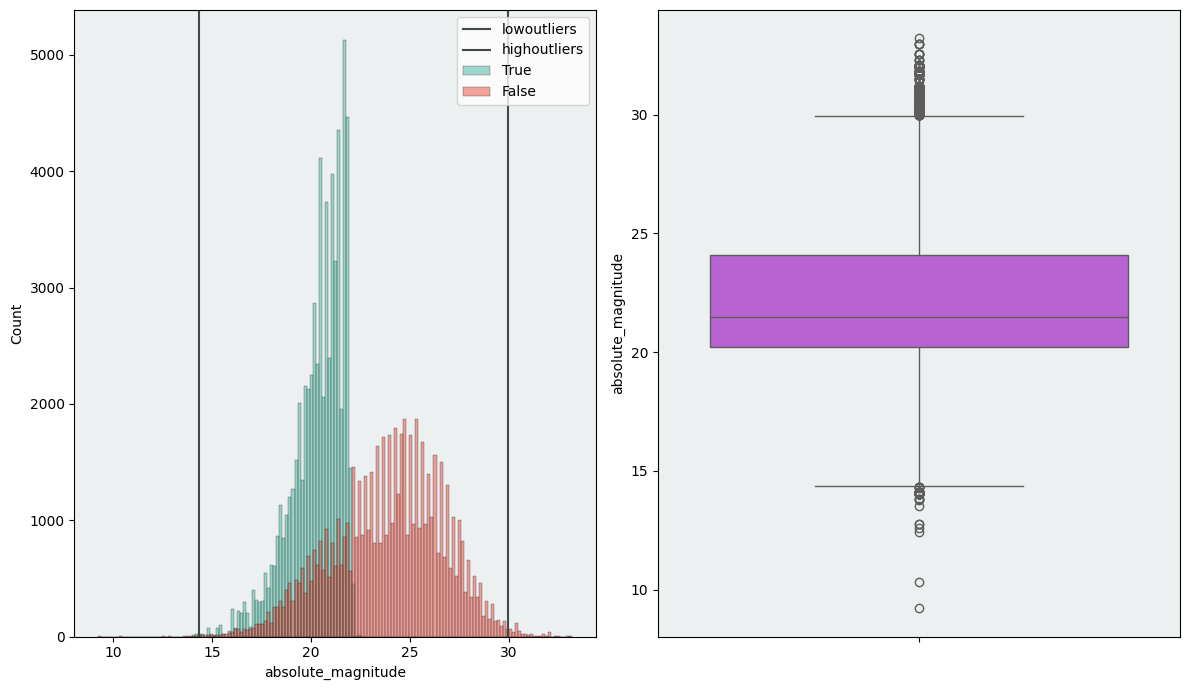

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'absolute_magnitude' , hue = 'hazardous', palette=['#e74c3c', '#45b39d'], ax = ax1)
plt.gca().set_facecolor('#f0f0f0')
ax1.axvline(x = lowoutliers, color='#424949')
ax1.axvline(x = highoutliers, color='#424949')
sns.boxplot(data_analyses.absolute_magnitude, palette=['#c150e5'], ax = ax2)
ax1.legend(['lowoutliers', 'highoutliers', 'True' , 'False'])
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.tight_layout()
plt.show()

In [ ]:
data_noise = data_noise[data_noise['absolute_magnitude']<= lowoutliers]
data_noise = data_noise[data_noise['absolute_magnitude']>= highoutliers]

<ipython-input-68-2bd2288142ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.miss_distance, palette=['#c150e5'], ax = ax2)


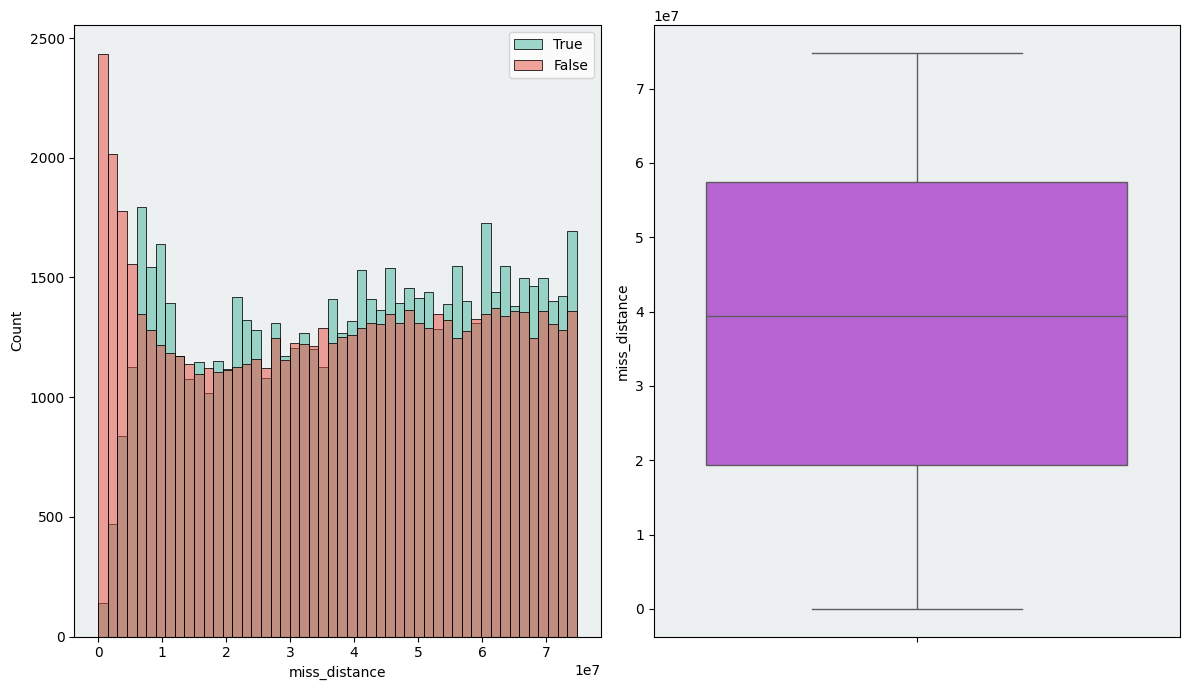

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'miss_distance' , hue = 'hazardous', palette=['#e74c3c', '#45b39d'], ax = ax1)
sns.boxplot(data_analyses.miss_distance, palette=['#c150e5'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
lowoutliers2  = data_analyses.relative_velocity.quantile(0.75) + (data_analyses.relative_velocity.quantile(0.75) - data_analyses.relative_velocity.quantile(0.25)) * 1.5

<ipython-input-70-999f31b2ca7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.relative_velocity, palette=['#c150e5'], ax = ax2)


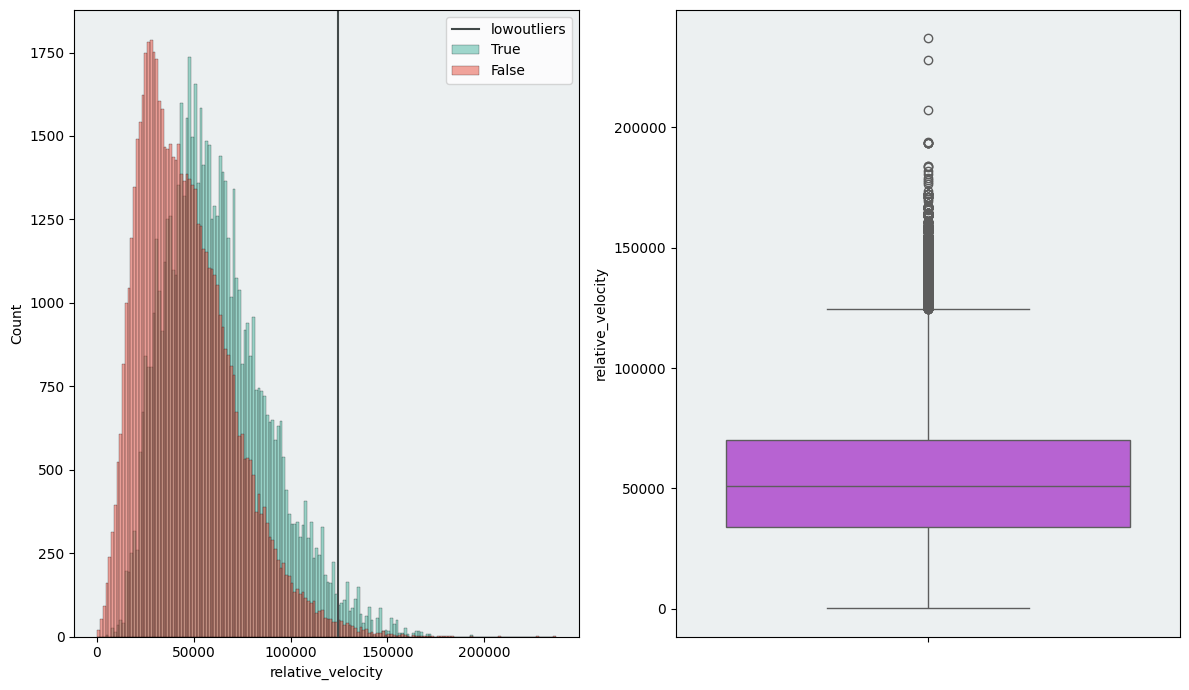

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'relative_velocity', palette=['#e74c3c', '#45b39d'], hue = 'hazardous' , ax = ax1)
ax1.axvline(x = lowoutliers2, color='#424949')
sns.boxplot(data_analyses.relative_velocity, palette=['#c150e5'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['relative_velocity']<= lowoutliers2]

In [ ]:
lowoutliers3  = data_analyses.est_diameter_max.quantile(0.75) + (data_analyses.est_diameter_max.quantile(0.75) - data_analyses.est_diameter_max.quantile(0.25)) * 1.5

<ipython-input-73-2b21876aa0ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_max, palette=['#c150e5'], ax = ax2)


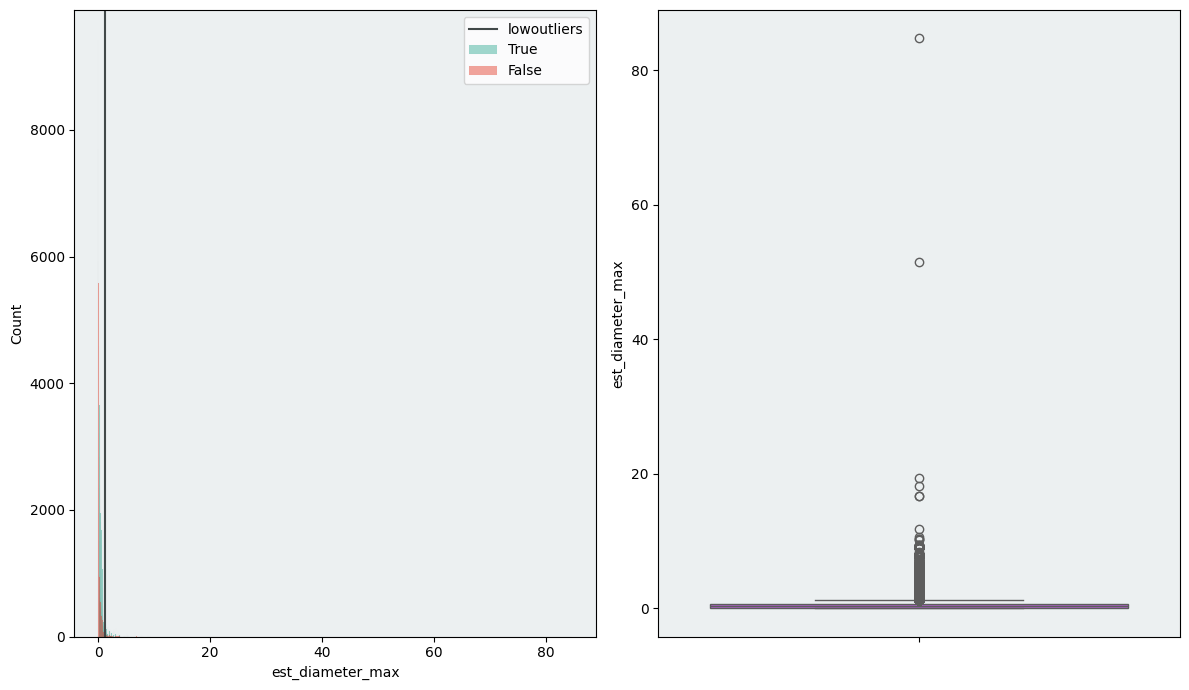

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_max' , hue = 'hazardous', palette=['#e74c3c', '#45b39d'], ax = ax1)
ax1.axvline(x = lowoutliers3, color='#424949')
sns.boxplot(data_analyses.est_diameter_max, palette=['#c150e5'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_max']<= lowoutliers3]

In [ ]:
lowoutliers4  = data_analyses.est_diameter_min.quantile(0.75) + (data_analyses.est_diameter_min.quantile(0.75) - data_analyses.est_diameter_min.quantile(0.25)) * 1.5

<ipython-input-76-2e12c5bb1de8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_min, palette=['#c150e5'], ax = ax2)


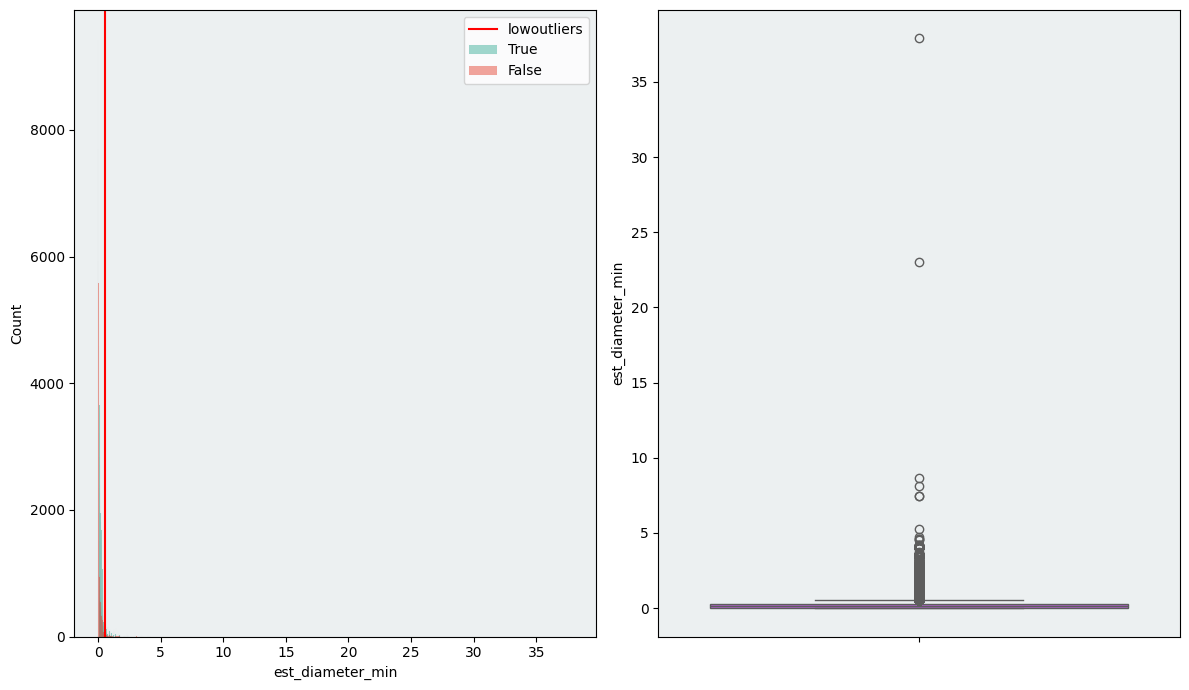

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_min' , hue = 'hazardous', palette=['#e74c3c', '#45b39d'], ax = ax1)
ax1.axvline(x = lowoutliers4, color='red')
sns.boxplot(data_analyses.est_diameter_min, palette=['#c150e5'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_min']<= lowoutliers4]

# **Pairplot for noise-free data**  ⏳


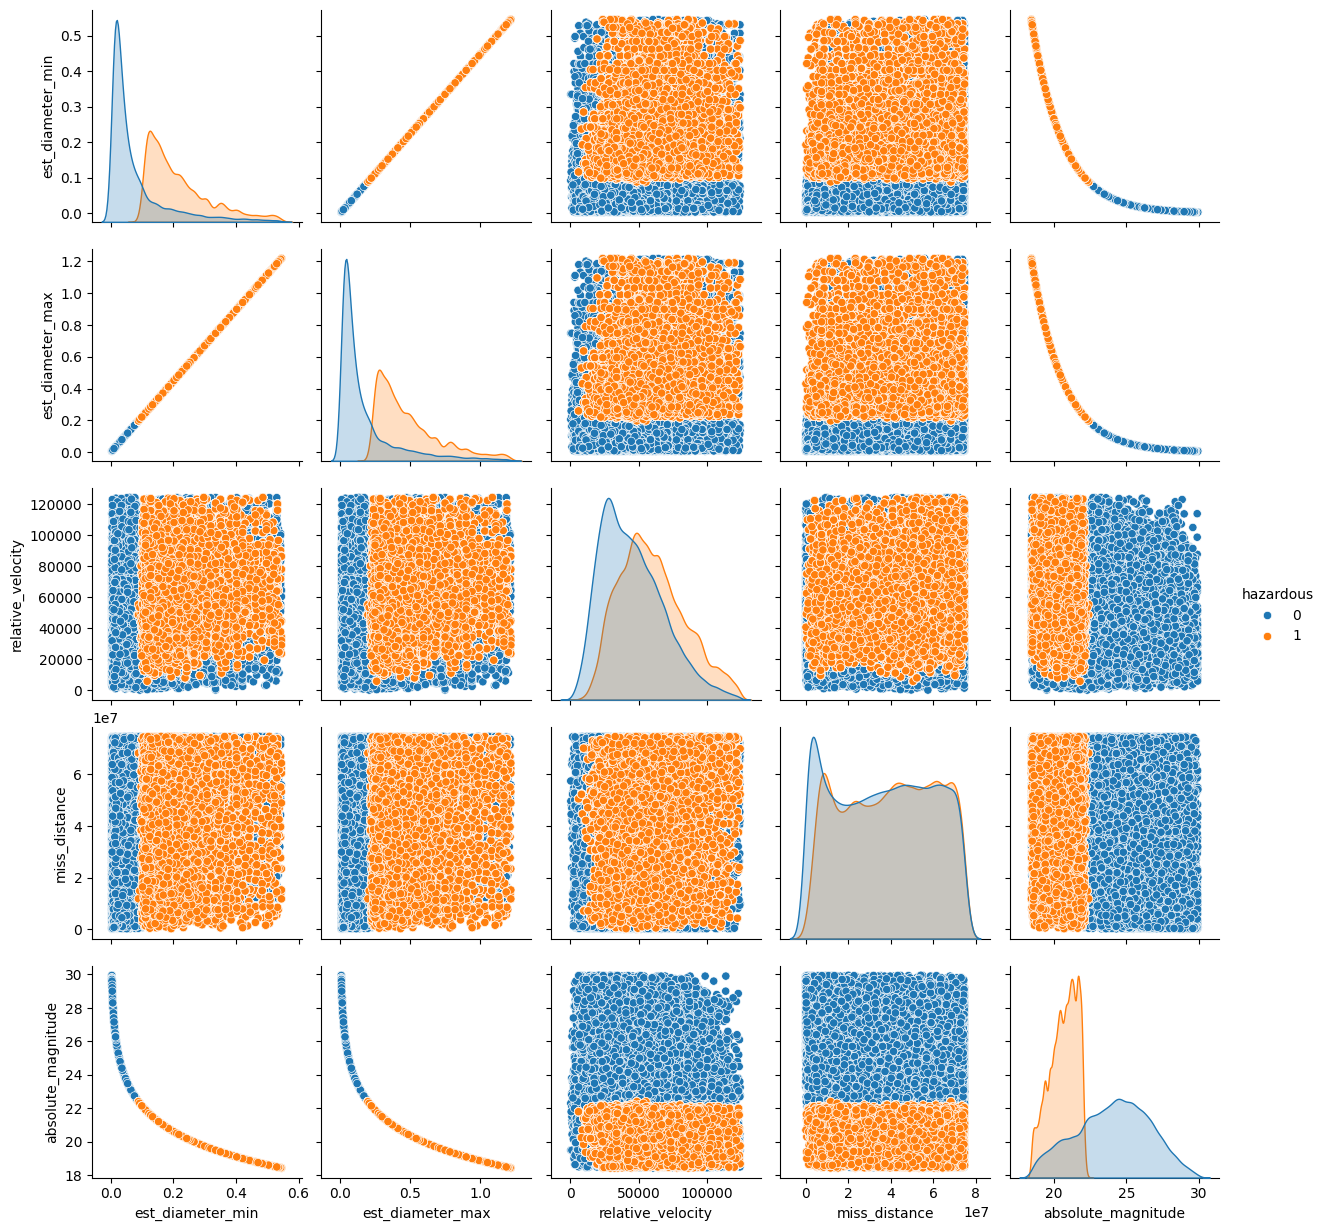

In [ ]:
sns.pairplot(data_noise , hue = 'hazardous')

# **Heat map**

<Axes: >

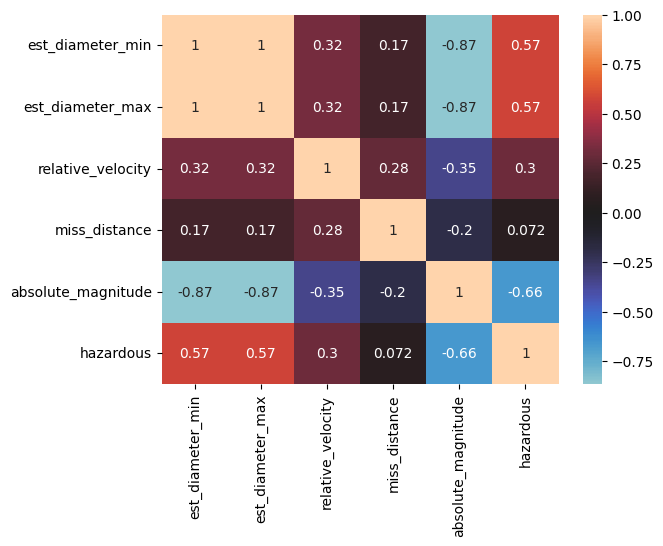

In [ ]:
sns.heatmap(data_noise.corr() , center = 0 , annot = True)

In [ ]:
data_noise.drop(['est_diameter_min'], axis=1, inplace=True)


# **Correlation of features**

In [ ]:
vifd = pd.DataFrame()
vifd['Feature'] = data_noise.columns
vifd['VIF'] = [variance_inflation_factor(data_noise.values, i) for i in range(data_noise.shape[1])]
display(vifd)

,Feature,VIF
0,est_diameter_max,3.734711
1,relative_velocity,6.631425
2,miss_distance,4.316237
3,absolute_magnitude,5.474850
4,hazardous,2.914748


# **Box plot based on classes**

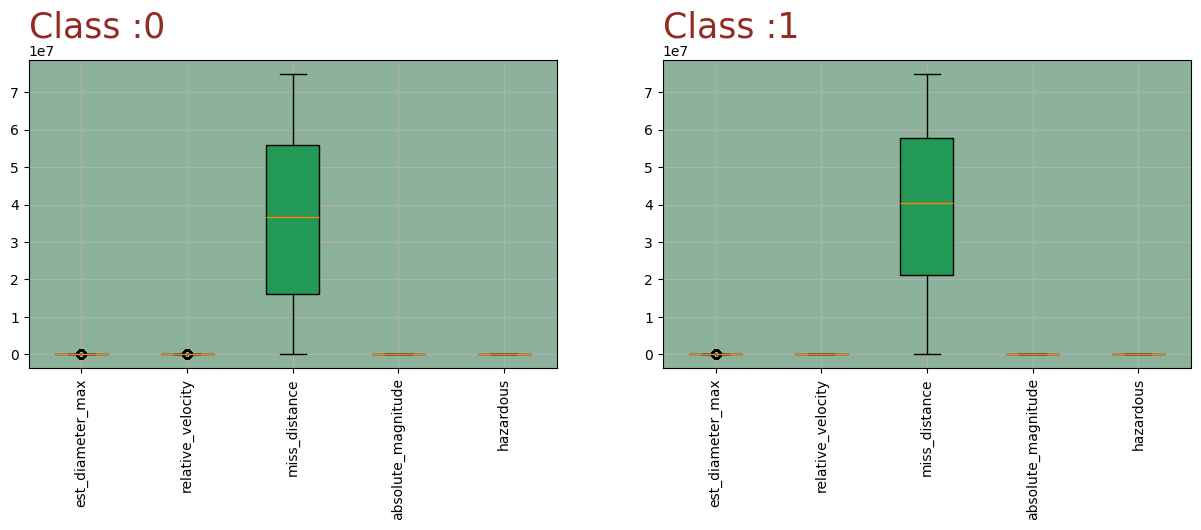

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
groups = data_noise.groupby('hazardous')

axes = [ax1, ax2]
for (label, group), a in zip(groups, axes):
    box = a.boxplot(group[['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']],
                     patch_artist=True)
    colors = ['#229954', '#2e4053', '#229954', '#FF7F50', '#c39bd3']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    a.set_title('Class :' + str(label), color='#922b21', fontsize=25, loc='left')
    a.set_xticks([1, 2, 3, 4, 5])
    a.set_xticklabels(['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous'], rotation=90)
    a.set_facecolor('#8db29c')
    a.grid()

plt.show()

In [ ]:
test_data.drop(['sentry_object', 'orbiting_body', 'est_diameter_min'] , axis = 1 , inplace = True)

# **train__teast**

In [ ]:
x_test, y_test = [test_data.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), test_data['hazardous']]
x_train, y_train = [data_noise.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), data_noise['hazardous']]

# **Algorithm**

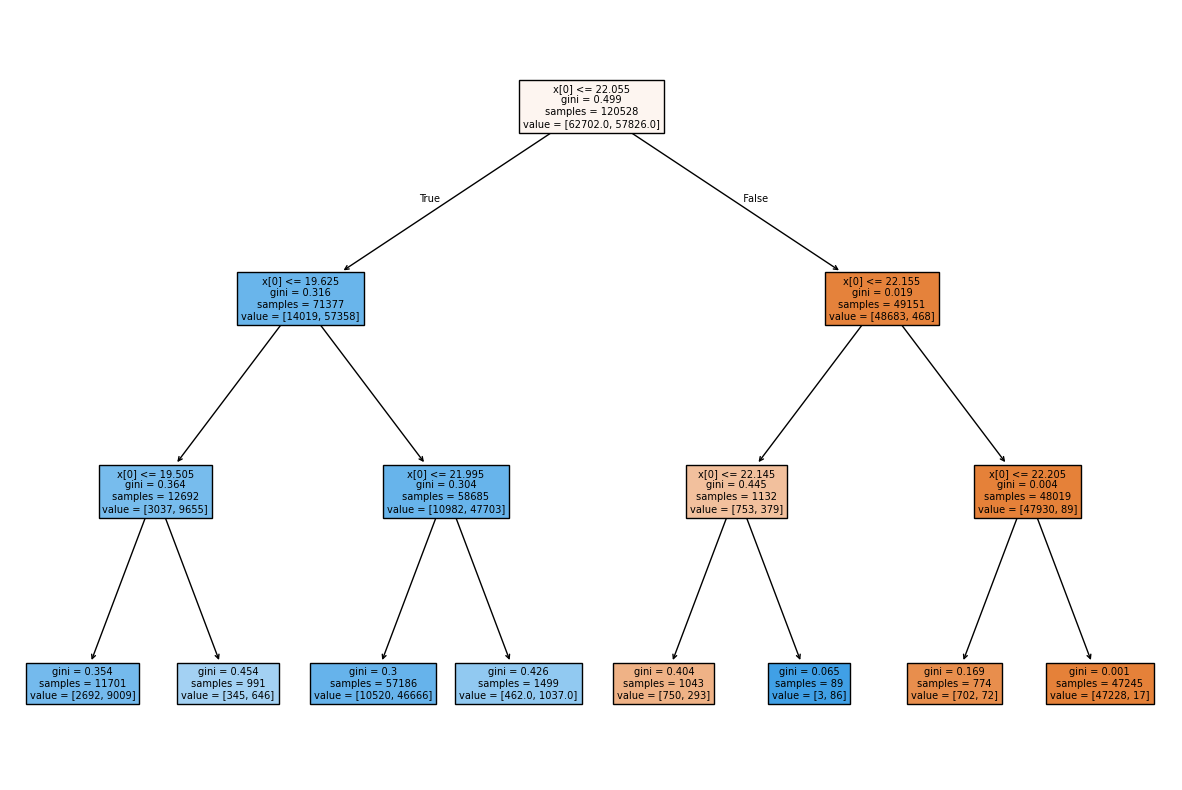

,Model,Accuracy,Precision,Recall,F1,Training Time (s),Prediction Time (s)
0,Knn,0.908,0.679,0.064,0.116,0.112,3.042
1,Decisiontree,0.772,0.293,0.992,0.453,0.188,0.003
2,Logisticregression,0.778,0.290,0.918,0.441,0.265,0.003
3,SVM rbf,0.772,0.289,0.952,0.443,891.966,27.892
4,SVM linear,0.762,0.285,0.998,0.444,310.213,15.985


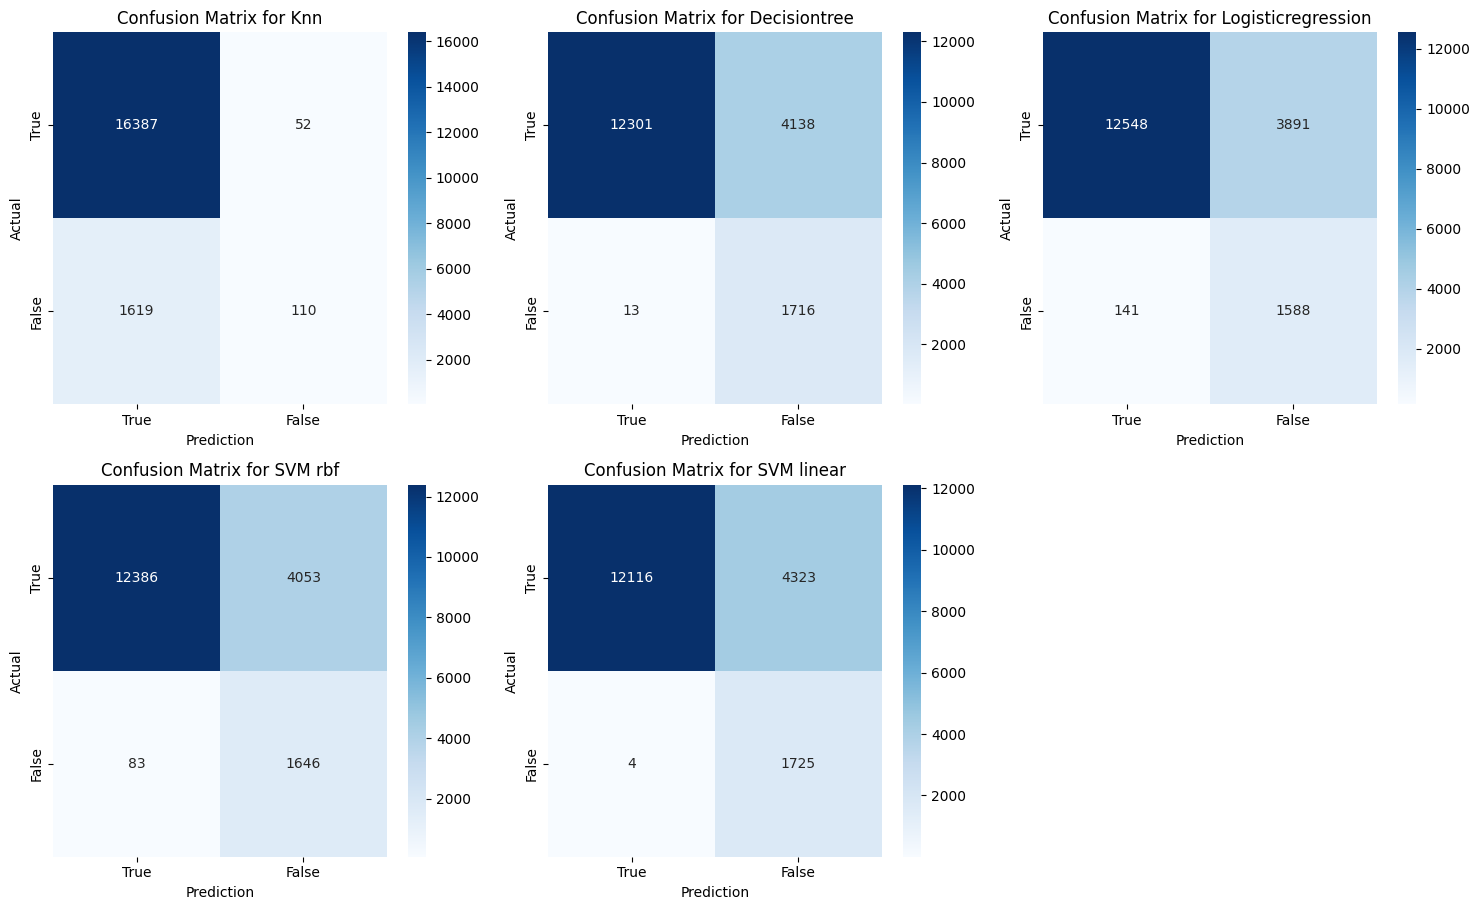

In [ ]:
models = {"Knn": KNeighborsClassifier(n_neighbors= 2, p=2),
          "Decisiontree": DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 42),
          "Logisticregression": LogisticRegression(solver="liblinear", max_iter= 200),
          "SVM rbf": SVC(kernel="rbf", gamma=2, C=1.0),
          "SVM linear": SVC(kernel="linear", gamma=2, C=1.0)
          }

result = []

coma = {}

for (name, model), a in zip(models.items(), axes):
    # Measure training time
    start_time = time.time()
    model.fit(x_train, y_train)
    train_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(x_test)
    pred_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,  y_pred)

    # Append results
    result.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1": round(f1, 3),
        "Training Time (s)": round(train_time, 3),
        "Prediction Time (s)": round(pred_time, 3)
    })

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    coma[name] = cm

    # Plot Decisiontree if the model is DecisionTreeClassifier
    if name == 'Decisiontree':
        plt.figure(figsize= (15,10))
        tree.plot_tree(model, filled= True)
        plt.show()

result_df = pd.DataFrame(result)
display(result_df)


# plt.figure(figsize= (15,10))
# tree.plot_tree(model, filled= True)
# plt.show()

# Create a 3x3 subplot for confusion matrices
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (15,10))

# Flatten axes for easier iteration
axes = axes.flatten()

for i, (name, cm) in enumerate(coma.items()):
    sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', ax= axes[i],
                xticklabels= ['True', 'False'], yticklabels= ['True', 'False'])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Prediction')
    axes[i].set_ylabel('Actual')

# Hide unused subplots (if fewer then 9 models)
for j in range(len(coma), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect= [0, 0.03, 1, 0.95])
plt.show()